In [1]:
# In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

# Your first objective is to build a series of scatter plots to showcase the following relationships:

# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import json
import requests
from citipy import citipy
from Config1 import api_key
import time

from Config1 import api_key

In [4]:
import numpy as np    
url = "http://api.openweathermap.org/data/2.5/weather?"
part_url="&appid="
query_url = f"{url}appid={api_key}&q="
cities = []
lat=[]
temp=[]
humidity=[]
wind_speed=[]
cloudiness=[]
citk=[]


size = 3500
my_longitudes = np.random.uniform(-180, 180, size)





size = 3500

my_latitudes = np.random.uniform(-90, 90, size)
lat_lngs = zip(my_longitudes, my_latitudes)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
len(cities)


683

In [5]:
def even_chunks(l, n):
   for i in range(0, len(l), n):
      yield l[i:i + n]
kk=list(even_chunks(cities,59))


In [6]:
count=0
m=[]
lat=[]
temp=[]
citk=[]
cloudiness=[]
wind_speed=[]
humidity=[]
url = "http://api.openweathermap.org/data/2.5/weather?"
units="metric"
api_key="0093ac623a2f662b8acb48f5362a97ff"
query_url = f"{url}appid={api_key}&units={units}&q="

# c=kk[count]
while count<10:
    for k in kk[count]:
        response=requests.get(query_url+k).json()
        m.append(response)
        try:
            
            lat.append(response['coord']['lat'])
            temp.append(response['main']['temp'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            citk.append(response['name'])
            print(response['name'])
            print(response['id'])
        except:
            print("City not found")
            pass
            
            
        time.sleep(1)
    count=count+1
    

Saint-Pierre
935214
City not found
City not found
Port Alfred
964432
Bredasdorp
1015776
City not found
Qaanaaq
3831208
Ushuaia
3833367
Dikson
1507390
Longyearbyen
2729907
Kamina
214614
San Ramon
5392593
City not found
Port Elizabeth
964420
Albany
5106841
Ribeira Grande
3372707
Road Town
3577430
Rundu
3353383
Bathsheba
3374083
Vaideeni
663968
Vestmannaeyjar
3412093
Matara
1235846
Piltene
456696
Manacapuru
3663529
Arraial do Cabo
3471451
Ilulissat
3423146
Ponta do Sol
2264557
Ostrovnoy
556268
Torbay
6167817
Redondo
2264009
Mersa Matruh
352733
Upernavik
3418910
Busselton
2075265
Cascais
2269594
Sarankhola
1185239
Punta Arenas
3874787
Hermanus
3366880
Saint-Louis
2246451
Camacha
2270385
Kinsale
2963155
Narsaq
3421719
City not found
Lebu
3883457
City not found
Santa Rosa
1687894
Gazalkent
1513996
Sidi Ali
2487130
George Town
1735106
Zhezkazgan
1516589
Saint-Philippe
935215
Sechura
3691954
Bambous Virieux
1106677
Cururupu
3401148
Olinda
3393536
Hithadhoo
1282256
Cape Town
3369157
Koson
12170

In [7]:
weather_dict={
    "city":citk,
    "latitude":lat,
    "temperature":temp,
    "humidity":humidity,
    "wind speed":wind_speed,
    "cloudiness":cloudiness
    
    
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data


,city,latitude,temperature,humidity,wind speed,cloudiness
0,Saint-Pierre,-21.34,23.14,74,4.60,75
1,Port Alfred,-33.59,20.00,94,4.93,57
2,Bredasdorp,-34.53,22.55,78,5.70,37
3,Qaanaaq,77.48,-31.82,67,2.26,0
4,Ushuaia,-54.80,17.50,45,2.01,0
...,...,...,...,...,...,...
535,Dera Bugti,29.03,13.06,32,0.83,0
536,Kishtwar,33.32,-11.64,27,4.23,0
537,Manicore,-5.81,25.29,85,0.34,100
538,Terra Santa,-2.10,32.65,45,1.46,95


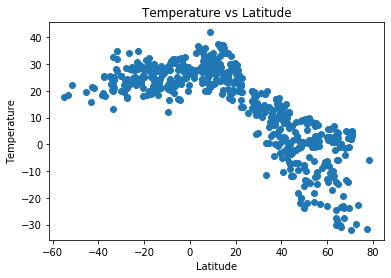

In [9]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['latitude']
y_values = weather_data['temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature vs Latitude')

plt.savefig("C:\\Users\\samantha.ettinger\\Python APIs\\Temp_Lat_All.png")
plt.show()
#Findings
#The higher the lattitude, the lower the temperature and vice versa


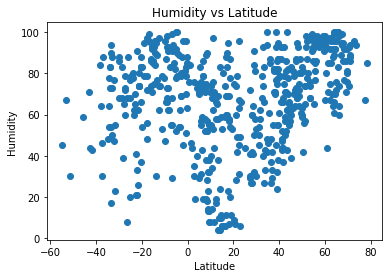

In [10]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_data['latitude']
y_values = weather_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs Latitude')
plt.savefig("C:\\Users\\samantha.ettinger\\Python APIs\\Hum_Lat_All.png")
plt.show()
#Findings
#Humididty and latitude don't seem to be strongly correlated

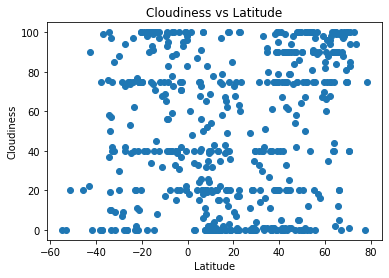

In [12]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = weather_data['latitude']
y_values = weather_data['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs Latitude')
plt.savefig("C:\\Users\\samantha.ettinger\\Python APIs\\Cloud_Lat_All.png")
plt.show()
#Findings
#Cloudiness and latitude don't seem to be strongly correlated

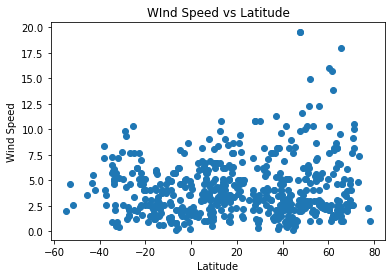

In [13]:
# Create a Scatter Plot for wind speed vs latitude
x_values = weather_data['latitude']
y_values = weather_data['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('WInd Speed vs Latitude')
plt.savefig("C:\\Users\\samantha.ettinger\\Python APIs\\Wind_Lat_All.png")
plt.show()
#Findings
#Wind Speed and latitude don't seem to be strongly correlated, however, there do not seem to many locations where wind speed reaches over 10 mph

In [15]:
#grab data for only northern hemisphere
only_northern_hemisphere = weather_data.loc[weather_data["latitude"] >= 0, :]
only_northern_hemisphere


,city,latitude,temperature,humidity,wind speed,cloudiness
3,Qaanaaq,77.48,-31.82,67,2.26,0
5,Dikson,73.51,-22.61,94,7.43,94
6,Longyearbyen,78.22,-6.00,85,1.00,75
8,San Ramon,37.78,9.60,81,2.11,1
10,Albany,42.60,-5.23,57,5.10,75
...,...,...,...,...,...,...
533,Moose Factory,51.26,-22.00,57,5.70,1
534,Alanya,36.54,4.00,27,7.70,0
535,Dera Bugti,29.03,13.06,32,0.83,0
536,Kishtwar,33.32,-11.64,27,4.23,0


In [16]:
#grab data for only southern hemisphere
only_southern_hemisphere = weather_data.loc[weather_data["latitude"] < 0, :]



The r-squared is: -0.8602610495561859


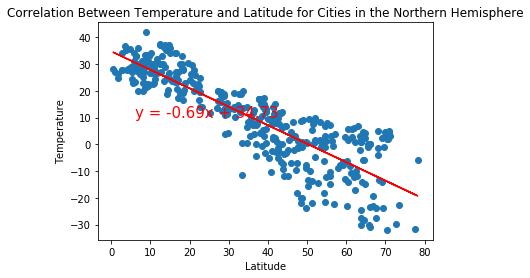

The correlation coefficient is -86.02610495561856


In [17]:
#Linear Regression showing Temperature vs Latitude for cities in the northern hemisphere
from scipy.stats import linregress

x_axis=only_northern_hemisphere["latitude"]
y_axis=only_northern_hemisphere["temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation Between Temperature and Latitude for Cities in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue}")
plt.savefig("C:\\Users\\samantha.ettinger\\Python APIs\\N_Temp_Latitude.png")
plt.show()
correlation=st.pearsonr(x_axis,y_axis)
correlation
cf=correlation[0]*100
print (f"The correlation coefficient is {cf}")
#Findings
#As temperature increases, latitude decreases and vice versa

The r-squared is: 0.2523062145238063


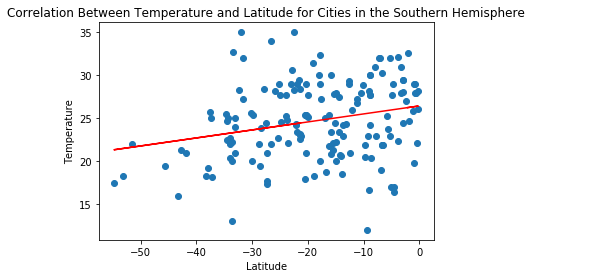

The correlation coefficient is 25.230621452380653


In [18]:
x_axis=only_southern_hemisphere["latitude"]
y_axis=only_southern_hemisphere["temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation Between Temperature and Latitude for Cities in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue}")
plt.savefig("C:\\Users\\samantha.ettinger\\Python APIs\\S_Temp_Latitude.png")
plt.show()
correlation=st.pearsonr(x_axis,y_axis)
correlation
cf=correlation[0]*100
print (f"The correlation coefficient is {cf}")
#Findings
# Temperature and latitude for cities in the southern hemisphere don't seem to have a strong correlation

The r-squared is: 0.5521470080634364


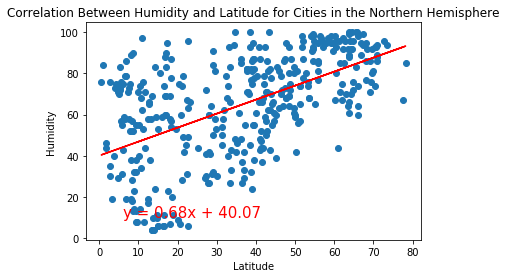

The correlation coefficient is 55.21470080634365


In [19]:
x_axis=only_northern_hemisphere["latitude"]
y_axis=only_northern_hemisphere["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation Between Humidity and Latitude for Cities in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig("C:\\Users\\samantha.ettinger\\Python APIs\\N_Hum_Latitude.png")
plt.show()
correlation=st.pearsonr(x_axis,y_axis)
correlation
cf=correlation[0]*100
print (f"The correlation coefficient is {cf}")
#Findings
# Humidity and latitude for cities in the northern hemisphere don't seem to have a strong correlation

The r-squared is: 0.31917061176055717


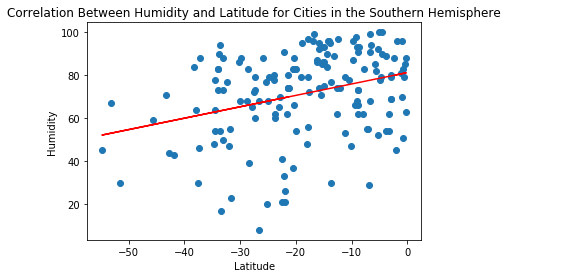

The correlation coefficient is 31.91706117605571


In [20]:
x_axis=only_southern_hemisphere["latitude"]
y_axis=only_southern_hemisphere["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation Between Humidity and Latitude for Cities in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig("C:\\Users\\samantha.ettinger\\Python APIs\\S_Hum_Latitude.png")
plt.show()
correlation=st.pearsonr(x_axis,y_axis)
correlation
cf=correlation[0]*100
print (f"The correlation coefficient is {cf}")
#Findings
# Humidity and latitude for cities in the southern hemisphere don't seem to have a strong correlation

The r-squared is: 0.4195793975316026


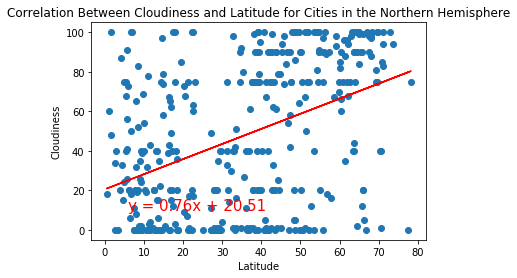

The correlation coefficient is 41.95793975316027


In [21]:
x_axis=only_northern_hemisphere["latitude"]
y_axis=only_northern_hemisphere["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation Between Cloudiness and Latitude for Cities in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig("C:\\Users\\samantha.ettinger\\Python APIs\\N_Cloud_Latitude.png")
plt.show()
correlation=st.pearsonr(x_axis,y_axis)
correlation
cf=correlation[0]*100
print (f"The correlation coefficient is {cf}")
#Findings
# Cloudiness and latitude for cities in the northern hemisphere don't seem to have a strong correlation

The r-squared is: 0.31732512179631234


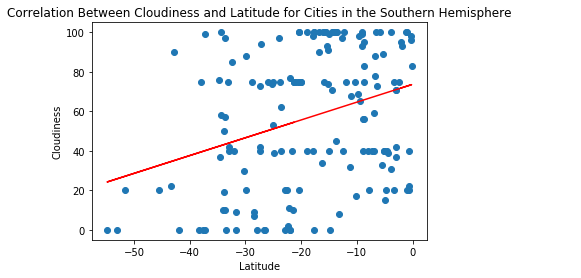

The correlation coefficient is 31.73251217963123


In [22]:
x_axis=only_southern_hemisphere["latitude"]
y_axis=only_southern_hemisphere["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation Between Cloudiness and Latitude for Cities in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig("C:\\Users\\samantha.ettinger\\Python APIs\\S_Cloud_Latitude.png")
plt.show()
correlation=st.pearsonr(x_axis,y_axis)
correlation
cf=correlation[0]*100
print (f"The correlation coefficient is {cf}")
#Findings
# Cloudiness and latitude for cities in the southern hemisphere don't seem to have a strong correlation

The r-squared is: 0.07554817115615582


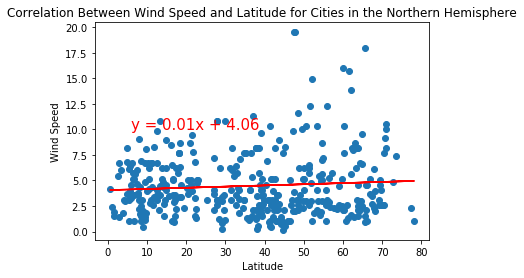

The correlation coefficient is 7.554817115615581


In [23]:
x_axis=only_northern_hemisphere["latitude"]
y_axis=only_northern_hemisphere["wind speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation Between Wind Speed and Latitude for Cities in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.savefig("C:\\Users\\samantha.ettinger\\Python APIs\\N_Wind_Latitude.png")
plt.show()
correlation=st.pearsonr(x_axis,y_axis)
correlation
cf=correlation[0]*100
print (f"The correlation coefficient is {cf}")
#Findings
# Wind Speed stays pretty low at roughly less than 10 mph for cities in the northern hemisphere

The r-squared is: -0.22622080647761908


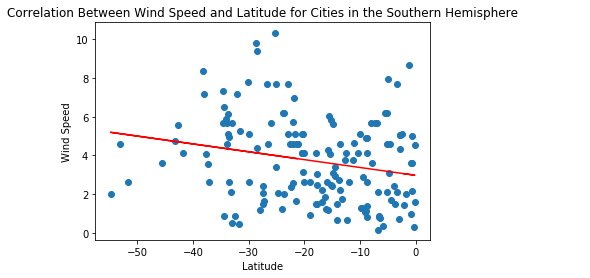

The correlation coefficient is -22.622080647761912


In [25]:
x_axis=only_southern_hemisphere["latitude"]
y_axis=only_southern_hemisphere["wind speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation Between Wind Speed and Latitude for Cities in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.savefig("C:\\Users\\samantha.ettinger\\Python APIs\\S_Wind_Latitude.png")
plt.show()
correlation=st.pearsonr(x_axis,y_axis)
correlation
cf=correlation[0]*100
print (f"The correlation coefficient is {cf}")
#Findings
# There isn't a strong correlation between wind speed and latitude for cities in the southern hemisphere
